# Image Classification

In this project, I will be loading a dataset of images of cats and dogs. I will then run my own implementation of kNN classifier to classify the test data. I will use both euclidean and manhattan distances for varying values of k to determine the optimal value of k for this task. I will later use scikit-learn to implement the kNN algorithm.
Lastly, I will implement the same on a weather dataset.

In [8]:
!gdown --id 1hI9BOGBF5QQss64b0qZESBb7-qh-tIiW

Downloading...
From: https://drive.google.com/uc?id=1hI9BOGBF5QQss64b0qZESBb7-qh-tIiW
To: /content/CatsandDogs.zip
228MB [00:02, 112MB/s]


In [9]:
!unzip "CatsandDogs.zip"

Streaming output truncated to the last 5000 lines.
  inflating: CatsandDogs/training_set/cats/cat.37.jpg  
  inflating: CatsandDogs/training_set/cats/cat.370.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3700.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3701.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3702.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3703.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3704.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3705.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3706.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3707.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3708.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3709.jpg  
  inflating: CatsandDogs/training_set/cats/cat.371.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3710.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3711.jpg  
  inflating: CatsandDogs/training_set/cats/cat.3712.jpg  
  inflating: CatsandDogs/

## Own kNN Implementation


For Euclidean for k = 1
Classification accuracy: 0.605
Confusion Matrix:
 [[746 536]
 [254 464]]
F1 score: 0.6538124452234881

For Euclidean for k = 2
Classification accuracy: 0.6325
Confusion Matrix:
 [[833 568]
 [167 432]]
F1 score: 0.693877551020408

For Euclidean for k = 3
Classification accuracy: 0.6325
Confusion Matrix:
 [[833 568]
 [167 432]]
F1 score: 0.693877551020408

For Euclidean for k = 4
Classification accuracy: 0.6385
Confusion Matrix:
 [[860 583]
 [140 417]]
F1 score: 0.7040523945968072

For Euclidean for k = 5
Classification accuracy: 0.6385
Confusion Matrix:
 [[860 583]
 [140 417]]
F1 score: 0.7040523945968072

For Euclidean for k = 6
Classification accuracy: 0.6335
Confusion Matrix:
 [[878 611]
 [122 389]]
F1 score: 0.7055042185616712

For Euclidean for k = 7
Classification accuracy: 0.6335
Confusion Matrix:
 [[878 611]
 [122 389]]
F1 score: 0.7055042185616712

For Manhattan for k = 1
Classification accuracy: 0.637
Confusion Matrix:
 [[711 437]
 [289 563]]
F1 score:

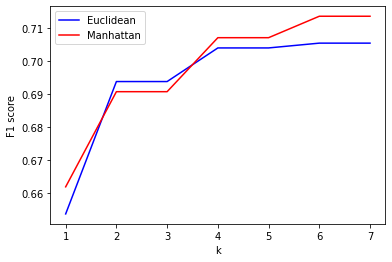

In [11]:
import glob
import cv2
import skimage.feature
import numpy as np
import math
import matplotlib.pyplot as plt


def knn(k, dis, training_cats, training_dogs, test_img):

  test_img_new = cv2.resize(test_img, dsize = (64,32))
  test_img_edited = skimage.feature.hog(test_img_new)
  dist_cats = []
  dist_dogs = []

  if(dis == "Euclidean"):

    for i in range(training_cats.shape[0]): #i compare test img with all images in cat training set
      temp_array = np.subtract(test_img_edited, training_cats[i, :])
      euclidean_distance = np.linalg.norm(temp_array) #first i subtract both arraysthen take norm of that array
      dist_cats.append(euclidean_distance)
     
    for i in range(training_dogs.shape[0]): #i compare test img with all images in dog training set
      temp_array = np.subtract(test_img_edited, training_dogs[i, :])
      euclidean_distance = np.linalg.norm(temp_array) 
      dist_dogs.append(euclidean_distance)

    dist_cats.sort() #i sort both distance arrays
    dist_dogs.sort()
    y = 0
    count_cats = 0
    count_dogs = 0
    while y<k:           # i find all k values in this loop
      if (dist_cats[count_cats] < dist_dogs[count_dogs]):
        count_cats = count_cats + 1

      elif (dist_cats[count_cats] > dist_dogs[count_dogs]):
        count_dogs = count_dogs + 1
      y = y+1

    if count_cats > count_dogs: #i return the greater count
        return "cat"

    elif count_dogs > count_cats:
      return "dog"

    else:         #in the case that the count is equal take k-1
      if (dist_cats[count_cats] < dist_dogs[count_dogs]): #remove the kth value
        return "cat"
      else:
        return "dog"

      
  elif(dis == "Manhattan"): #do the same as above for manhattan
    for i in range(training_cats.shape[0]):
      temp_array = np.subtract(test_img_edited, training_cats[i, :])
      manhattan_distance = np.sum(np.absolute(temp_array)) #subtract both arrays then take absolute of each value and sum
      dist_cats.append(manhattan_distance)
    
  
    for i in range(training_dogs.shape[0]):
      temp_array = np.subtract(test_img_edited, training_dogs[i, :])
      manhattan_distance = np.sum(np.absolute(temp_array))
      dist_dogs.append(manhattan_distance)

    dist_cats.sort()
    dist_dogs.sort()
    y = 0
    count_cats = 0
    count_dogs = 0
    while y<k:
      if (dist_cats[count_cats] < dist_dogs[count_dogs]):
        count_cats = count_cats + 1

      elif (dist_cats[count_cats] > dist_dogs[count_dogs]):
        count_dogs = count_dogs + 1

      y = y+1

    if count_cats > count_dogs:
        return "cat"

    elif count_dogs > count_cats:
      return "dog"

    else:
      if (dist_cats[count_cats] < dist_dogs[count_dogs]): #remove the kth value
        return "cat"
      else:
        return "dog"




def accuracy(perceived_result1, actual_result1, perceived_result2, actual_result2): #this function calculates the accuracy metrics
  true_positive = 0 #letting dog as positive and cat as negative
  false_positive = 0
  true_negative = 0
  false_negative = 0


  for r in perceived_result1:
    if r == actual_result1:
      true_negative +=1 
    else:
      false_positive +=1

  for r in perceived_result2:
    if r == actual_result2:
      true_positive +=1
    else:
      false_negative += 1

  classification_accuracy = (true_positive + true_negative) / (len(perceived_result1) + len(perceived_result2))
  print("Classification accuracy:", classification_accuracy)

  confusion_matrix = np.array([[true_positive, false_positive], [false_negative, true_negative]])
  print("Confusion Matrix:\n", confusion_matrix)

  precision = true_positive/(true_positive + false_positive)
  recall = true_positive / (true_positive + false_negative)

  f1_score = 2 * ( (precision*recall) / (precision+recall) )
  print("F1 score:", f1_score)

  return f1_score

#Classification accuracy gives the ratio of correct results to total results. This is not a good enough ratio as it does not let us know what is really happening with the data
#F1_score on the other hand takes into account the true positives, true negatives, false positives, and false negatives
#So it gives a more reasonable score
#This F1 score can then further be used to check differences in accuracy for different classification algorithms
#However, F1 also has its flaws, such as giving different score values when variables given as positive and negative are inverted for 2-variable case




def running(k, dis, img_cats_test, img_dogs_test, img_cats_edited, img_dogs_edited): #this is used to call the knn
  result_cats = []
  for x in img_cats_test: #calls knn for each img in cat
    y = knn(k, dis, img_cats_edited, img_dogs_edited, x)
    result_cats.append(y)

  result_dogs = []
  for x in img_dogs_test: #calls knn for each img in dog
    y = knn(k, dis, img_cats_edited, img_dogs_edited, x)
    result_dogs.append(y)

  print("\nFor", dis, "for k =", k)
  acc = accuracy(result_cats, "cat", result_dogs, "dog")
  return acc
  


img_cats = [cv2.imread(i) for i in glob.glob('/content/CatsandDogs/training_set/cats/*', recursive = True)] #to read the images
img_dogs = [cv2.imread(i) for i in glob.glob('/content/CatsandDogs/training_set/dogs/*', recursive = True)]
img_cats_test = [cv2.imread(i) for i in glob.glob('/content/CatsandDogs/test_set/cats/*', recursive = True)] 
img_dogs_test = [cv2.imread(i) for i in glob.glob('/content/CatsandDogs/test_set/dogs/*', recursive = True)]


temp_list = []
label = [] #give label to each data. giving label of 0 to cat and 1 to dog
for x in img_cats:
  x = cv2.resize(x, dsize = (64,32)) #resize images to 64x32
  img_cats_temp = skimage.feature.hog(x) #use hog on images to turn them into 1d arrays by extracting gradients
  temp_list.append(img_cats_temp.tolist()) 
  label.append(0)

img_cats_edited = np.array(temp_list)


temp_list = [] 
for x in img_dogs:
  x = cv2.resize(x, dsize = (64,32))
  img_dogs_temp = skimage.feature.hog(x)
  temp_list.append(img_dogs_temp.tolist())
  label.append(1)

img_dogs_edited = np.array(temp_list)


f1_euclidean = []
for k in range(1,8):
  temp = running(k, "Euclidean", img_cats_test, img_dogs_test, img_cats_edited, img_dogs_edited)
  f1_euclidean.append(temp)

f1_manhattan = []
for k in range(1,8):
  temp = running(k, "Manhattan", img_cats_test, img_dogs_test, img_cats_edited, img_dogs_edited)
  f1_manhattan.append(temp)


plt.plot([1,2,3,4,5,6,7], f1_euclidean, 'b-', label = "Euclidean")
plt.plot([1,2,3,4,5,6,7], f1_manhattan, 'r-', label = "Manhattan")
plt.legend()
plt.xlabel('k')
plt.ylabel('F1 score')
plt.show()




## Using scikit learn kNN Implementation


For Euclidean for k = 1
Classification Accuracy: 0.605
Confusion Matrix:
 [[464 536]
 [254 746]]
F1 score: 0.6538124452234881

For Euclidean for k = 2
Classification Accuracy: 0.631
Confusion Matrix:
 [[658 342]
 [396 604]]
F1 score: 0.6207605344295991

For Euclidean for k = 3
Classification Accuracy: 0.6325
Confusion Matrix:
 [[432 568]
 [167 833]]
F1 score: 0.693877551020408

For Euclidean for k = 4
Classification Accuracy: 0.66
Confusion Matrix:
 [[578 422]
 [258 742]]
F1 score: 0.6857670979667283

For Euclidean for k = 5
Classification Accuracy: 0.6385
Confusion Matrix:
 [[417 583]
 [140 860]]
F1 score: 0.7040523945968072

For Euclidean for k = 6
Classification Accuracy: 0.666
Confusion Matrix:
 [[529 471]
 [197 803]]
F1 score: 0.7062445030782761

For Euclidean for k = 7
Classification Accuracy: 0.6335
Confusion Matrix:
 [[389 611]
 [122 878]]
F1 score: 0.7055042185616712

For Manhattann for k = 1
Classification Accuracy: 0.637
Confusion Matrix:
 [[563 437]
 [289 711]]
F1 score: 0

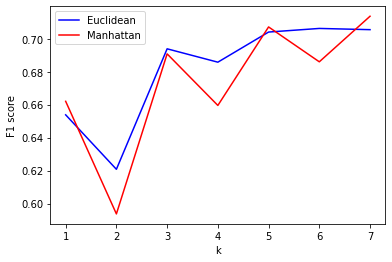

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics


training_data = np.concatenate((img_cats_edited, img_dogs_edited))
label = np.array(label)
label.reshape(-1,1) #label is reshaped to pass as arg in model.fit


f1_euclidean = []
for k in range(1,8):

  model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean') #this is used to call the kneighborsclassifier function and specify metric and k

  model.fit(training_data, label) #this is used to fit the model

  y_pred_cats = np.array([])
  for i in img_cats_test:
    i = cv2.resize(i, dsize=(64,32))
    img_cats_t = skimage.feature.hog(i)
    y_pred_cats = np.append(y_pred_cats,model.predict([img_cats_t])) #this is used to predict the value

  y_pred_dogs = np.array([])
  for i in img_dogs_test:
    i = cv2.resize(i, dsize=(64,32))
    img_dogs_t = skimage.feature.hog(i)
    y_pred_dogs = np.append(y_pred_dogs,model.predict([img_dogs_t]))

  y_pred = np.concatenate((y_pred_cats, y_pred_dogs))
  y_accurate = np.concatenate(( np.full((1000, ), 0), np.full((1000, ), 1))) #cats are given 0 and dogs are given 1
  s1 = sklearn.metrics.accuracy_score(y_accurate, y_pred) #this return classification accuracy
  s2 = sklearn.metrics.f1_score(y_accurate, y_pred)
  s3 = sklearn.metrics.confusion_matrix(y_accurate, y_pred)
  print("\nFor Euclidean for k =", k)
  print("Classification Accuracy:", s1)
  print("Confusion Matrix:\n", s3)
  print("F1 score:", s2)
  f1_euclidean.append(s2)


f1_manhattan = []
for k in range(1,8):

  model = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')

  model.fit(training_data, label)

  y_pred_cats = np.array([])
  for i in img_cats_test:
    i = cv2.resize(i, dsize=(64,32))
    img_cats_t = skimage.feature.hog(i)
    y_pred_cats = np.append(y_pred_cats,model.predict([img_cats_t]))

  y_pred_dogs = np.array([])
  for i in img_dogs_test:
    i = cv2.resize(i, dsize=(64,32))
    img_dogs_t = skimage.feature.hog(i)
    y_pred_dogs = np.append(y_pred_dogs,model.predict([img_dogs_t]))

  y_pred = np.concatenate((y_pred_cats, y_pred_dogs))
  y_accurate = np.concatenate(( np.full((1000, ), 0), np.full((1000, ), 1)))
  s1 = sklearn.metrics.accuracy_score(y_accurate, y_pred)
  s2 = sklearn.metrics.f1_score(y_accurate, y_pred)
  s3 = sklearn.metrics.confusion_matrix(y_accurate, y_pred)
  f1_manhattan.append(s2)
  print("\nFor Manhattann for k =", k)
  print("Classification Accuracy:", s1)
  print("Confusion Matrix:\n", s3)
  print("F1 score:", s2)


plt.plot([1,2,3,4,5,6,7], f1_euclidean, 'b-', label = "Euclidean")
plt.plot([1,2,3,4,5,6,7], f1_manhattan, 'r-', label = "Manhattan")
plt.legend()
plt.xlabel('k')
plt.ylabel('F1 score')
plt.show()


## Implementation of kNN on the weather dataset

In [ ]:
!gdown --id 1HUpJua1XLPPv-HgKaDEpG2JKkW9qaHpc

Downloading...
From: https://drive.google.com/uc?id=1HUpJua1XLPPv-HgKaDEpG2JKkW9qaHpc
To: /content/WeatherDataset.zip
95.4MB [00:00, 104MB/s] 


In [ ]:
!unzip "WeatherDataset.zip"

Archive:  WeatherDataset.zip
   creating: WeatherDataset/
   creating: WeatherDataset/Test data/
   creating: WeatherDataset/Test data/Cloudy/
  inflating: WeatherDataset/Test data/Cloudy/cloudy235.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy236.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy237.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy238.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy239.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy240.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy241.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy248.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy249.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy250.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy251.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy252.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy253.jpg  
  inflating: WeatherDataset/Test data/Cloudy/cloudy254.jpg  
  i


For Euclidean for k =  1
Classification Accuracy: 0.8303571428571429
Confusion Matrix:
 [[37.  2.  6.  1.]
 [18. 40.  3.  1.]
 [ 2.  0. 40.  0.]
 [ 3.  0.  2. 69.]]
F1 score: 0.8335806253057305

For Euclidean for k =  2
Classification Accuracy: 0.8303571428571429
Confusion Matrix:
 [[37.  2.  6.  1.]
 [18. 40.  3.  1.]
 [ 2.  0. 40.  0.]
 [ 3.  0.  2. 69.]]
F1 score: 0.8335806253057305

For Euclidean for k =  3
Classification Accuracy: 0.7767857142857143
Confusion Matrix:
 [[26.  2.  7.  1.]
 [31. 40.  3.  1.]
 [ 1.  0. 39.  0.]
 [ 2.  0.  2. 69.]]
F1 score: 0.7939402587519027

For Euclidean for k =  4
Classification Accuracy: 0.78125
Confusion Matrix:
 [[26.  1.  7.  1.]
 [30. 41.  3.  1.]
 [ 2.  0. 39.  0.]
 [ 2.  0.  2. 69.]]
F1 score: 0.7964872002927466

For Euclidean for k =  5
Classification Accuracy: 0.7723214285714286
Confusion Matrix:
 [[27.  2.  9.  1.]
 [31. 40.  3.  1.]
 [ 2.  0. 37.  0.]
 [ 0.  0.  2. 69.]]
F1 score: 0.7865474900686169

For Euclidean for k =  6
Classifica

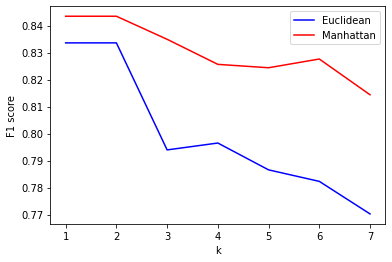

In [18]:
import glob
import cv2
import numpy as np


def macro_accuracy (N, perceived_result, actual_result):
  confusion_matrix = np.zeros((N,N)) #make a NxN matrix with values initialized as 0

  for i in range(len(actual_result)):
    confusion_matrix[perceived_result[i]][actual_result[i]] += 1  #increase the value in the matrix at the specified position

  classification_accuracy = 0
  for i in range(N):
    classification_accuracy +=  confusion_matrix[i][i]  #takes all true values
  classification_accuracy = classification_accuracy/ (len(perceived_result)) #is divided by the total values

  f1_score = []
  for i in range(N):
    precision = confusion_matrix[i][i] / np.sum(confusion_matrix[i]) #using precision formula on matrix
    recall = confusion_matrix[i][i] / np.sum(confusion_matrix[i, :]) #using recall formula on matrix
    f1_score.append( (2*precision*recall) / (precision + recall) )

  macro_average_f1_score = sum(f1_score) / N


  return classification_accuracy, macro_average_f1_score, confusion_matrix



#first i will run loop for all testing data. Run one test data against all training data.   
#Store all distances along with their label [label, distance] and then sort distances    
#Take k top distances and then return the highest value of label   
#If value is same for two keep decreasing k until one wins     
# result will be list of 0,1,2,3, etc which will correspond to each    
def N_knn(k, dis, training_data, test_data):
  result = []
  
  if dis == "euclidean":

    for t in test_data:
      test_temp = t[1:]

      euclidean_distance = []
      for tr in training_data:
        temp_array = np.subtract(test_temp, tr[1:])
        euclidean_distance.append([tr[0] ,np.linalg.norm(temp_array)])

      euclidean_distance = np.array(euclidean_distance) #turns into numpy array
      euclidean_distance_sorted = euclidean_distance[np.argsort(euclidean_distance[:,1])]  #this sorts the array based on second column[distances]

      k_temp = k
      while(k_temp>0): #Arbitrary condition. Need loop to run until only one label found for test data

        k_labels = euclidean_distance_sorted[0:k_temp, 0] 
        k_labels = [int(x) for x in k_labels]
        top_label = []


        counts = np.bincount(k_labels) #this takes the no. of occurences of each value and stores it at that index of value
        max_count = max(counts)  #this is the max number of times one value repeats itself

        for i in range(len(counts)): #for all the unique values
          if counts[i] == max_count: #for all the values that repeat the most times
            top_label.append(i)
        
        if(len(top_label) == 1):
          break

        k_temp = k_temp-1 #try for different k

      result.append(top_label[0])

    return result
      

  elif dis == "manhattan":

    for t in test_data:
      test_temp = t[1:]

      manhattan_distance = []
      for tr in training_data:
        temp_array = np.subtract(test_temp, tr[1:])
        manhattan_distance.append([tr[0] ,np.sum(np.absolute(temp_array))])

      manhattan_distance = np.array(manhattan_distance) #turns into numpy array
      manhattan_distance_sorted = manhattan_distance[np.argsort(manhattan_distance[:,1])]  #this sorts the array based on second column[distances]

      k_temp = k
      while(k_temp>0): #Arbitrary condition. Need loop to run until only one top label

        k_labels = manhattan_distance_sorted[0:k_temp, 0] 
        k_labels = [int(x) for x in k_labels]
        top_label = []

        counts = np.bincount(k_labels) #this takes the no. of occurences of each value and stores it at that index of value
        max_count = max(counts)     #this takes the highest no. of occurences

        for i in range(len(counts)):
          if counts[i] == max_count:
            top_label.append(i)
        
        if(len(top_label) == 1):
          break

        k_temp = k_temp-1

      result.append(top_label[0])

    return result


def flattened(img_to_flatten, l): #this function is used to flatten the rgb values
  img_flattened = []
  for x in img_to_flatten:
    y = x.flatten().tolist()
    y.insert(0,l)   #the label is inserted at start of array
    img_flattened.append(y)

  z = np.array(img_flattened)
  return z


img_cloudy = np.array([cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Training data/Cloudy/*', recursive = True)])
img_rain = np.array([ cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Training data/Rain/*', recursive = True)])
img_shine = np.array([ cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Training data/Shine/*', recursive = True)])
img_sunrise = np.array([ cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Training data/Sunrise/*', recursive = True)])
img_cloudy_test_initial = np.array([ cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Test data/Cloudy/*', recursive = True)])
img_rain_test_initial = np.array([ cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Test data/Rain/*', recursive = True)])
img_shine_test_initial = np.array([ cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Test data/Shine/*', recursive = True)])
img_sunrise_test_initial = np.array([ cv2.resize((cv2.imread(i)), (32,32)) for i in glob.glob('/content/WeatherDataset/Test data/Sunrise/*', recursive = True)])


#assigning 0 to cloudy, 1 to rain, 2 to shine, and 3 to sunrise
img_cloudy = flattened(img_cloudy, 0)
img_rain = flattened(img_rain, 1)
img_shine = flattened(img_shine, 2)
img_sunrise = flattened(img_sunrise, 3)
img_cloudy_test = flattened(img_cloudy_test_initial, 0)
img_rain_test = flattened(img_rain_test_initial, 1)
img_shine_test = flattened(img_shine_test_initial, 2)
img_sunrise_test = flattened(img_sunrise_test_initial, 3)



training_data = np.concatenate((img_cloudy, img_rain, img_shine, img_sunrise))
test_data = np.concatenate((img_cloudy_test, img_rain_test, img_shine_test, img_sunrise_test))


f1_euclidean = []
for k in range(1,8):
  percevied_result = N_knn(k, "euclidean", training_data, test_data)
  actual_result = np.concatenate(( np.full((img_cloudy_test_initial.shape[0], ), 0), np.full((img_rain_test_initial.shape[0], ), 1), 
                                np.full((img_shine_test_initial.shape[0], ), 2), np.full((img_sunrise_test_initial.shape[0], ), 3))) 
  

  classification_accuracy, f1, confusion_matrix = macro_accuracy(4, percevied_result, actual_result)
  print("\nFor Euclidean for k = " , k)
  print("Classification Accuracy:", classification_accuracy)
  print("Confusion Matrix:\n", confusion_matrix)
  print("F1 score:", f1)
  f1_euclidean.append(f1)

f1_manhattan = []
for k in range(1,8):
  percevied_result = N_knn(k, "manhattan", training_data, test_data)
  actual_result = np.concatenate(( np.full((img_cloudy_test_initial.shape[0], ), 0), np.full((img_rain_test_initial.shape[0], ), 1), 
                                np.full((img_shine_test_initial.shape[0], ), 2), np.full((img_sunrise_test_initial.shape[0], ), 3)))

  classification_accuracy, f1, confusion_matrix = macro_accuracy(4, percevied_result, actual_result)
  print("\nFor Manhattan for k = " , k)
  print("Classification Accuracy:", classification_accuracy)
  print("Confusion Matrix:\n", confusion_matrix)
  print("F1 score", f1)
  f1_manhattan.append(f1)


plt.plot([1,2,3,4,5,6,7], f1_euclidean, 'b-', label = "Euclidean")
plt.plot([1,2,3,4,5,6,7], f1_manhattan, 'r-', label = "Manhattan")
plt.legend()
plt.xlabel('k')
plt.ylabel('F1 score')
plt.show()

